## imports

In [1]:
from bigraph_viz import plot_bigraph, plot_multitimestep, plot_flow
from bigraph_viz.dict_utils import replace_regex_recursive, pp

save_images = False
plot_settings = {
    'remove_process_place_edges': True, 
    'size':'8,5', 
    'show_types': True, 
}
save_images_settings = {
    'out_dir': 'out/NIH_NIA',
    'dpi': '250'
}
if save_images:
    plot_settings.update(save_images_settings)

In [2]:
from IPython.display import display, HTML

def display_figs(fig_list, n_rows=1):
    # Loop over the fig_list and convert each fig to SVG format
    svg_list = [fig.pipe(format='svg').decode('utf-8') for fig in fig_list]
    
    # Calculate the number of columns
    n_cols = len(svg_list) // n_rows
    if len(svg_list) % n_rows != 0:  # Add an extra column if there are extra figures
        n_cols += 1
    
    # Create the HTML table
    html_code = "<table>"
    for i in range(n_rows):
        html_code += "<tr>"
        for j in range(n_cols):
            idx = i * n_cols + j
            if idx < len(svg_list):  # Ensure we don't go out of range of the list
                html_code += f"<td>{svg_list[idx]}</td>"
        html_code += "</tr>"
    html_code += "</table>"

    # Display the table
    display(HTML(html_code))

## model components

In [3]:
fba = {
    'flux balance analysis (FBA)': {
        '_ports': {
            'fluxes': 'Any',
            'flux bounds': 'Any',
        }
    }
}
kinetic = {
    'kinetic model (ODE)': {
        '_ports': {
            'concentrations': 'Any',
            'rates': 'Any',
        }
    }
}
msdm = {
    'multiscale diffusion model (MSDM)': {
        '_ports': {
            'composition': 'Any',
            'diffusion coefficients': 'Any',
        }
    }
}
pde = {
    'continuous spatial model (PDE)': {
        '_ports': {
            'fields': 'Any',
            'diffusion rates': 'Any',
        }
    }
}
abm = {
    'agent-based model (ABM)': {
        '_ports': {
            'agents': 'Any',
            'environment': 'Any'
        }
    }
}
compartment = {
    'compartmental model': {
        '_ports': {
            'compartments': 'Any',
            'exchange': 'Any'
        }
    }
}


# plot
fba_fig = plot_bigraph(
    replace_regex_recursive(fba), **plot_settings, rankdir='RL', filename='fig1/fba_process')
kinetic_fig = plot_bigraph(
    replace_regex_recursive(kinetic), **plot_settings, rankdir='RL', filename='fig1/kinetic_process')
msdm_fig = plot_bigraph(
    replace_regex_recursive(msdm), **plot_settings, rankdir='RL', filename='fig1/msdm_process')
pde_fig = plot_bigraph(
    replace_regex_recursive(pde), **plot_settings, rankdir='RL', filename='fig1/pde_process')
abm_fig = plot_bigraph(
    replace_regex_recursive(abm), **plot_settings, rankdir='RL', filename='fig1/abm_process')
compartment_fig = plot_bigraph(
    replace_regex_recursive(compartment), **plot_settings, rankdir='RL', filename='fig1/compartment_process')

fig_list = [
    fba_fig, kinetic_fig, msdm_fig, pde_fig, abm_fig, compartment_fig
]
display_figs(fig_list, n_rows=2)

"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 8.1.0 (20230707.0739) --> <!-- Title: bigraph Pages: 1 --> bigraph <!-- ('flux<br/>balance<br/>analysis<br/>(FBA)',) --> ('flux<br/>balance<br/>analysis<br/>(FBA)',) flux balance analysis (FBA) <!-- ('flux<br/>balance<br/>analysis<br/>(FBA)', 'fluxes') --> <!-- ('flux<br/>balance<br/>analysis<br/>(FBA)', 'fluxes')->('flux<br/>balance<br/>analysis<br/>(FBA)',) --> ('flux<br/>balance<br/>analysis<br/>(FBA)', 'fluxes')->('flux<br/>balance<br/>analysis<br/>(FBA)',) fluxes <!-- ('flux<br/>balance<br/>analysis<br/>(FBA)', 'flux<br/>bounds') --> <!-- ('flux<br/>balance<br/>analysis<br/>(FBA)', 'flux<br/>bounds')->('flux<br/>balance<br/>analysis<br/>(FBA)',) --> ('flux<br/>balance<br/>analysis<br/>(FBA)', 'flux<br/>bounds')->('flux<br/>balance<br/>analysis<br/>(FBA)',) flux bounds","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 8.1.0 (20230707.0739) --> <!-- Title: bigraph Pages: 1 --> bigraph <!-- ('kinetic<br/>model<br/>(ODE)',) --> ('kinetic<br/>model<br/>(ODE)',) kinetic model (ODE) <!-- ('kinetic<br/>model<br/>(ODE)', 'concentrations') --> <!-- ('kinetic<br/>model<br/>(ODE)', 'concentrations')->('kinetic<br/>model<br/>(ODE)',) --> ('kinetic<br/>model<br/>(ODE)', 'concentrations')->('kinetic<br/>model<br/>(ODE)',) concentrations <!-- ('kinetic<br/>model<br/>(ODE)', 'rates') --> <!-- ('kinetic<br/>model<br/>(ODE)', 'rates')->('kinetic<br/>model<br/>(ODE)',) --> ('kinetic<br/>model<br/>(ODE)', 'rates')->('kinetic<br/>model<br/>(ODE)',) rates","<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 8.1.0 (20230707.0739) --> <!-- Title: bigraph Pages: 1 --> bigraph <!-- ('multiscale<br/>diffusion<br/>model<br/>(MSDM)',) --> ('multiscale<br/>diffusion<br/>model<br/>(MSDM)',) multiscale diffusion model (MSDM) <!-- ('multiscale<br/>diffusion<br/>model<br/>(MSDM)', 'composition') --> <!-- ('multiscale<br/>diffusion<br/>model<br/>(MSDM)', 'composition')->('multiscale<br/>diffusion<br/>model<br/>(MSDM)',) --> ('multiscale<br/>diffusion<br/>model<br/>(MSDM)', 'composition')->('multiscale<br/>diffusion<br/>model<br/>(MSDM)',) composition <!-- ('multiscale<br/>diffusion<br/>model<br/>(MSDM)', 'diffusion<br/>coefficients') --> <!-- ('multiscale<br/>diffusion<br/>model<br/>(MSDM)', 'diffusion<br/>coefficients')->('multiscale<br/>diffusion<br/>model<br/>(MSDM)',) --> ('multiscale<br/>diffusion<br/>model<br/>(MSDM)', 'diffusion<br/>coefficients')->('multiscale<br/>diffusion<br/>model<br/>(MSDM)',) diffusion coefficients"
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 8.1.0 (20230707.0739) --> <!-- Title: bigraph Pages: 1 --> bigraph <!-- ('continuous<br/>spatial<br/>model<br/>(PDE)',) --> ('continuous<br/>spatial<br/>model<br/>(PDE)',) continuous spatial model (PDE) <!-- ('continuous<br/>spatial<br/>model<br/>(PDE)', 'fields') --> <!-- ('continuous<br/>spatial<br/>model<br/>(PDE)', 'fields')->('continuous<br/>spatial<br/>model<br/>(PDE)',) --> ('continuous<br/>spatial<br/>model<br/>(PDE)', 'fields')->('continuous<br/>spatial<br/>model<br/>(PDE)',) fields <!-- ('continuous<br/>spatial<br/>model<br/>(PDE)', 'diffusion<br/>rates') --> <!-- ('continuous<br/>spatial<br/>model<br/>(PDE)', 'diffusion<br/>rates')->('continuous<br/>spatial<br/>model<br/>(PDE)',) --> ('continuous<br/>spatial<br/>model<br/>(PDE)', 'diffusion<br/>rates')->('continuous<br/>spatial<br/>model<br/>(PDE)',) diffusion rates","<?xml version=""1.

## Summary figure

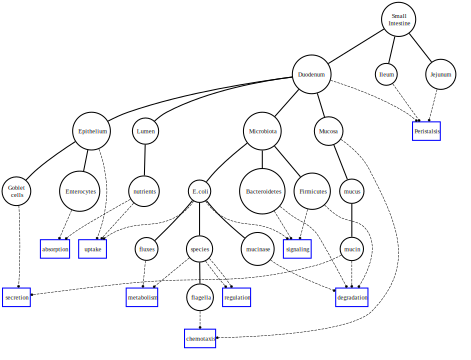

In [4]:
summary_schema = {
    'Small Intestine': {
        'Duodenum': {
            'Lumen': {
                'nutrients': {}},
            'Mucosa': {
                'mucus': {'mucin': 'Any'}},
            'Epithelium': {
                'Goblet cells': {
                    'secretion': {
                        '_ports': {'secreted': '', 'mucins': ''},
                        'wires': {
                            'secreted': ['..', '..', 'Mucosa', 'mucus', 'mucin'],
                            'mucins': ['..', 'Goblet cells',] }}
                },
                'Enterocytes': {},
                'absorption': {
                    '_ports': {'cells': '', 'nutrients': ''},
                    'wires': {
                        'cells': ['Enterocytes'],
                        'nutrients': ['..', 'Lumen', 'nutrients'],
                    }}
            },
            'Microbiota': {
                'E.coli': {
                    'mucinase': {},
                    'species': {
                        'flagella': {},
                    },
                    'fluxes': {},
                    'metabolism': {
                        '_ports': {
                            'species': 'Any',
                            'fluxes': 'Any'},
                        'wires': {
                            'species': ['species'],
                            'fluxes': ['fluxes']
                        }
                    },
                    'regulation': {
                        '_ports': {
                            'species': 'Any',
                            'tfs': 'Any'
                        },
                        'wires': {
                            'species': ['species'],
                            'tfs': ['species']
                        }
                    },
                    'chemotaxis': {
                        '_ports': {
                            'mucus': 'Any',
                            'flagella': 'Any'},
                        'wires': {
                            'mucus': ['..', '..', 'Mucosa'],
                            'flagella': ['species', 'flagella']
                        }
                    }
                },
                'Bacteroidetes': {},
                'Firmicutes': {},
                'signaling': {
                    '_ports': {'1': '', '2': '', '3': ''},
                    'wires': {
                        '1': ['E.coli'],
                        '2': ['Bacteroidetes'],
                        '3': ['Firmicutes'],
                    }}
            }, 
            'uptake': {
                '_ports': {
                    '1': '', '2': '', '3': '',},
                'wires': {
                    '1': ['Lumen', 'nutrients'],
                    '2': ['Microbiota', 'E.coli'],
                    '3': ['Epithelium']}},
            'degradation': {
                '_ports': {
                    '1': '', '2': '', '3': '', '4': ''},
                'wires': {
                    '1': ['Mucosa', 'mucus', 'mucin'],
                    '2': ['Microbiota', 'E.coli', 'mucinase'],
                    '3': ['Microbiota', 'Bacteroidetes'],
                    '4': ['Microbiota', 'Firmicutes'],
                }
            }
        },
        'Jejunum': {},
        'Ileum': {},
        'Peristalsis': {
            '_ports': {
                '1': '', '2': '', '3': ''},
            'wires': {
                '1': ['Duodenum'],
                '2': ['Jejunum'],
                '3': ['Ileum']}}}}

summary_schema = replace_regex_recursive(summary_schema)

# plot
plot_settings2 = {
    'node_groups':[
        [
            ('Small<br/>Intestine', 'Duodenum', 'Epithelium'), 
            ('Small<br/>Intestine', 'Duodenum', 'Microbiota'), 
            ('Small<br/>Intestine', 'Duodenum', 'Mucosa')
        ],
        [
            ('Small<br/>Intestine', 'Duodenum', 'Epithelium', 'Goblet<br/>cells'), 
            ('Small<br/>Intestine', 'Duodenum', 'Epithelium', 'Enterocytes'), 
            ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'E.coli'), 
            ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'Bacteroidetes'), 
            ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'Firmicutes'), 
        ],
    ], 
    'node_border_colors': {
        ('Small<br/>Intestine', 'Peristalsis'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'Epithelium', 'Goblet<br/>cells', 'secretion'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'E.coli', 'chemotaxis'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'E.coli', 'metabolism'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'E.coli', 'regulation'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'uptake'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'degradation'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'Microbiota', 'signaling'): 'blue',
        ('Small<br/>Intestine', 'Duodenum', 'Epithelium', 'absorption'): 'blue',
    },
    'remove_process_place_edges': True,
    'port_labels': False,
    **plot_settings}
plot_bigraph(summary_schema, **plot_settings2, filename='gut_microbiome')

## Vivarium basics

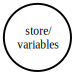

In [5]:
# simple spec
simple_object_spec = {'store/<br/>variables': {}}

# plot
plot_bigraph(simple_object_spec, **plot_settings, filename='store')

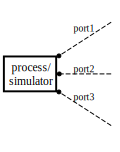

In [6]:
# process spec
process_spec = {
    'process/<br/>simulator': {
        '_ports': {
            'port1': 'type',
            'port2': 'type',
            'port3': 'type'}}}

# plot
plot_settings1 = {'rankdir':'RL', **plot_settings}
plot_bigraph(process_spec, **plot_settings1, filename='process')

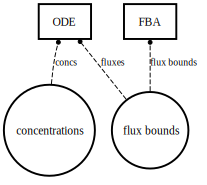

In [7]:
# composite spec
flat_composite_spec = {
    'concentrations': {},
    'flux bounds': {},
    'ODE': {
        '_ports': {'concs': 'type', 'fluxes': 'type',},
        'wires': {
            'concs': 'concentrations',
            'fluxes': 'flux bounds'}},
    'FBA': {
        '_ports': {'flux bounds': 'type'},
        'wires': {
            'flux bounds': 'flux bounds'}}}

# plot
plot_settings1 = {'rankdir':'BT', **plot_settings}
plot_bigraph(flat_composite_spec, **plot_settings1, filename='composite')

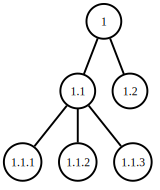

In [8]:
# hierarchy spec
hierarchy = {
    '1': {
        '1.1': {'1.1.1': '',
              '1.1.2': '',
              '1.1.3': ''},
        '1.2': {}}}

# plot
plot_bigraph(hierarchy, **plot_settings, filename='hierarchy')

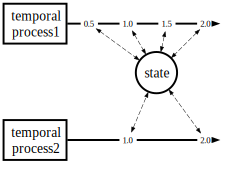

In [9]:
plot_settings3={}
if save_images:
    plot_settings3.update(save_images_settings)

multitimestep_spec = {
    'temporal process2': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 1.0,
    },
    'temporal process1': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 0.5,
    },
}
multitimestep_spec = replace_regex_recursive(multitimestep_spec)
plot_multitimestep(multitimestep_spec, total_time=2.0, **plot_settings3, filename='multitimestep')

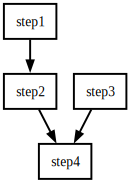

In [10]:
flow = {
    'step1': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': [], 
    },
    'step2': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': 'step1', 
    },
    'step3': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': [], 
    },
    'step4': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': ['step2', 'step3'], 
    },
}

plot_flow(flow, **plot_settings3, filename='flow')

## Modeling subaim 1

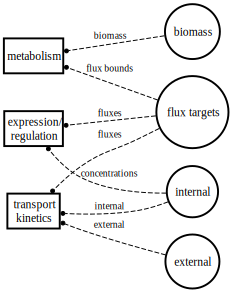

In [11]:
internal_concs = 'internal'
external_concs = 'external'

# aim 1 schema
aim1 = {
    'biomass': {},
    'flux targets': {},
    internal_concs: {},
    external_concs: {},
    'expression/<br/>regulation': {
        '_ports': {'fluxes': '', 'concentrations': ''},
        'wires': {
            'fluxes': 'flux targets',
            'concentrations': internal_concs
        }
    },
    'transport<br/>kinetics': {
        '_ports': {'fluxes': '', 'internal': '', 'external': '',},
        'wires': {
            'fluxes': 'flux targets',
            'internal': internal_concs,
            'external': external_concs,
        }
    },
    'metabolism': {
        '_ports': {'flux bounds': '', 'biomass': ''},
        'wires': {
            'flux bounds': 'flux targets',
            'biomass': 'biomass'}
    },
}

# plot
plot_settings2 = {'rankdir':'RL', **plot_settings}
plot_bigraph(aim1, **plot_settings2, filename='aim2')

## Modeling subaim 2

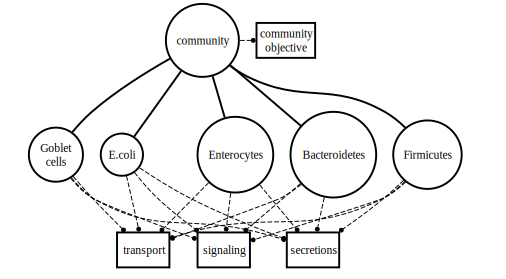

In [12]:
all_species = [
    'E.coli',
    'Bacteroidetes',
    'Firmicutes',
    'Goblet cells',
    'Enterocytes',
]
all_interactions = [
    'signaling',
    'transport',
    'secretions',
]

n_species = len(all_species)
n_interactions = len(all_interactions)

# generic schema
obj_schema = {'_ports': {'1': ''}, 'wires': {'1': []}}
molecular_mechanism_schema = {
            '_ports': {str(n+1): '' for n in range(n_species)},
            'wires': {
                str(n+1): all_species[n] for n in range(n_species)
            }}
species_schema = {all_species[n]: {} for n in range(n_species)}
interaction_schema = {all_interactions[n]: molecular_mechanism_schema for n in range(n_interactions)}

# aim 3 schema
aim3 = {
    'community': {
        **species_schema,
        **interaction_schema,
        'community<br/>objective': {
            '_ports': {'1': ''},
            'wires': {'1': []}
        },
    },
}

# plot
aim3 = replace_regex_recursive(aim3)
plot_settings2 = {
    'node_groups':[[
        # ('environment',), 
        ('community',), 
        ('community', 'community<br/>objective')]], 
    'invisible_edges': [
        (('community',), ('community', 'community<br/>objective')),
        (('community',), ('community', 'signaling')),
        (('community',), ('community', 'transport/<br/>secretions')),
    ],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim3, **plot_settings2, filename='aim3')

## Modeling subaim 3

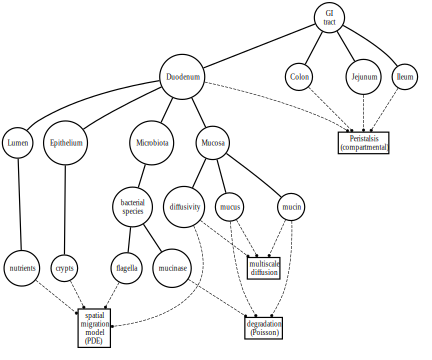

In [13]:
bacteria_id = 'bacterial species'

aim4 = {
    'GI tract': {
        'Duodenum': {
            'Lumen': {
                'nutrients': {}
            },
            'Mucosa': {
                'mucus': 'Any',
                'mucin': 'Any',
                'diffusivity': {},
                'multiscale diffusion': {
                    '_ports': {
                        '1': '', 
                        '2': '', 
                        '3': '', 
                    },
                    'wires': {
                        '1': ['diffusivity'],
                        '2': ['mucus'],
                        '3': ['mucin'],
                    }
                }
            },
            'Epithelium': {
                'crypts': {}
            },
            'Microbiota': {
                bacteria_id: {
                    'mucinase': {},
                    'flagella': {},
                },
            }, 
            'degradation (Poisson)': {
                '_ports': {
                    '1': '', 
                    '2': '',
                    '3': '',                
                },
                'wires': {
                    '1': ['Mucosa', 'mucin'],
                    '2': ['Mucosa', 'mucus'],
                    '3': ['Microbiota', bacteria_id, 'mucinase'],
                }
            },
            'spatial migration model (PDE)': {
                '_ports': {
                    'flagella': '', 
                    'signal': '',
                    'shape': '',
                    'diffusivity': '',
                },
                'wires': {
                    'flagella': ['Microbiota', bacteria_id, 'flagella'],
                    'signal': ['Lumen', 'nutrients'],
                    'shape': ['Epithelium', 'crypts'],
                    'diffusivity': ['Mucosa', 'diffusivity'],
                }
            }
        },
        'Jejunum': {},
        'Ileum': {},
        'Colon': {},
        'Peristalsis (compartmental)': {
            '_ports': {
                '1': '', '2': '', '3': '', '4': ''
            },
            'wires': {
                '1': ['Duodenum'],
                '2': ['Jejunum'],
                '3': ['Ileum'],
                '4': ['Colon']
            }
        }
    }
}

aim4 = replace_regex_recursive(aim4)

# plot
plot_settings2 = {
    'node_groups':[
        [
            ('GI<br/>tract', 'Duodenum', 'Epithelium'), 
            ('GI<br/>tract', 'Duodenum', 'Microbiota'), 
            ('GI<br/>tract', 'Duodenum', 'Mucosa')
        ]
    ], 
    'remove_process_place_edges': True,
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim4, **plot_settings2, filename='aim4')

## Modeling subaim 4

node ('environment',) not in graph


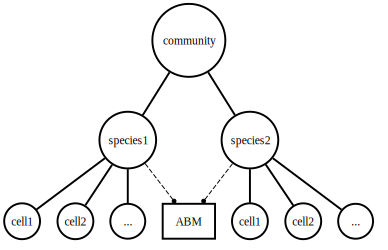

In [14]:
# aim 5 schema
aim5 = {
    'community': {
        'species1': {'cell1': {}, 'cell2': {}, '...': {}},
        'species2': {'cell1': {}, 'cell2': {}, '...': {}},
        'ABM': {
            '_ports': {
                '1': '', 
                '2': '', 
                # 'env': '',
            },
            'wires': {
                '1': 'species1',
                '2': 'species2',
                # 'env': ['..', '..', 'environment'],
            }}},
    # 'environment': {}
}

# plot
plot_settings2 = {
    'node_groups':[[('environment',), ('community',)]], 
    'invisible_edges': [(('community',), ('community', 'ABM'))],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim5, **plot_settings2, filename='aim5')